In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
import matplotlib.dates as mdates
import seaborn as sns

#make matplotlib plots included inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#set a default seaborn style
sns.set_style('whitegrid')

# Functions

In [2]:
#define function to set figure size
def figure_size (width, height):
    plt.rcParams['figure.figsize'] = (width, height)

In [3]:
#define function for bar chart
def bar_chart(i, x, y, colour, formatter, lim, labels, rotation, xlabel, ylabel, title):
    ax = plt.subplot(i)
    
    #plot bars
    plt.bar(x, y, color = colour)
   
    #change y axis format
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylim(lim)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = rotation, fontsize = 12)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_title(title, fontsize = 14)

In [4]:
#define function for side by side bar chart (2 bars)
def side_by_side_bar(i, bar_number, y, colour, y1, colour1, formatter, lim, x, rotation, xlabel, ylabel, 
                     label, label1, title):
    
    ax = plt.subplot(i)
    
    #determine number of bars
    num_bars = bar_number
    
    #determine how bars will be arranged along x axis
    x_ticks = np.arange(num_bars)
    
    #space between bars
    width = 0.4
    
    bar_1 = ax.bar(x_ticks, y, width, color = colour)
    bar_2 = ax.bar(x_ticks + width, y1, width, color = colour1)
    
    #set y axis format and limit
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylim(lim)
    
    ax.set_xticks(x_ticks + width / 2)
    ax.set_xticklabels(x, rotation = rotation, fontsize = 12)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.legend((bar_1, bar_2), (label, label1), loc = 'best')
    ax.set_title(title, fontsize = 14)
    
    #adjust space between subplots
    plt.subplots_adjust(hspace = 0.4)

In [5]:
#define function to plot line charts
def line_chart(i, x, y, colour, formatter, lim, rotation, ylabel, title):
    ax = plt.subplot(i)
    
    plt.plot(x, y, color = colour, linewidth = 2)
    
    #change axis format
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylim(lim)
    
    #set frequency of dates on x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday = 1, interval = 1, tz = None))
    
    #add labels
    ax.tick_params(axis = 'x', labelrotation = rotation)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_title(title, fontsize = 14)

In [6]:
#read in volumes data
volumes = pd.read_csv('/home/amybirdee/hobby_projects/Monzo/csv_files/july_volumes.csv', delimiter = ',')

In [7]:
#check table
volumes.head()

,year_month,total_spend,num_transactions,num_customers,total_spend_uk,num_transactions_uk,num_customers_uk
0,Jul 2017,3923.31,78,38,0.00,0,0
1,Jul 2018,14550120.08,497336,153131,5192.57,46,45
2,Jul 2019,33016510.45,1228939,378075,898143.56,27130,20216
3,Jul 2020,23176904.84,791551,251286,1317295.33,41204,29540
4,Jul 2021,26399877.81,908226,269976,1492363.18,47252,30792


In [8]:
#check datatypes
volumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_month           8 non-null      object 
 1   total_spend          8 non-null      float64
 2   num_transactions     8 non-null      int64  
 3   num_customers        8 non-null      int64  
 4   total_spend_uk       8 non-null      float64
 5   num_transactions_uk  8 non-null      int64  
 6   num_customers_uk     8 non-null      int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 576.0+ bytes


In [9]:
#add columns for spend in millions, transactions/customers in thousands for cleaner charts and UK % share
volumes['total_spend_mns'] = round(volumes['total_spend'] / 1000000, 1)
volumes['num_transactions_thousands'] = volumes['num_transactions'] / 1000
volumes['num_customers_thousands'] = volumes['num_customers'] / 1000

volumes['total_spend_uk_mns'] = round(volumes['total_spend_uk'] / 1000000, 1)
volumes['num_transactions_uk_thousands'] = volumes['num_transactions_uk'] / 1000
volumes['num_customers_uk_thousands'] = volumes['num_customers_uk'] / 1000

#add columns to show spend abroad
volumes['total_spend_abroad_mns'] = volumes['total_spend_mns'] - volumes['total_spend_uk_mns']
volumes['num_transactions_abroad_thousands'] = volumes['num_transactions_thousands'] - volumes['num_transactions_uk_thousands']
volumes['num_customers_abroad_thousands'] = volumes['num_customers_thousands'] - volumes['num_customers_uk_thousands'] 

#find UK percentage shares
volumes['total_spend_uk_share'] = round(volumes['total_spend_uk'] / volumes['total_spend'], 4) * 100
volumes['num_transactions_uk_share'] = round(volumes['num_transactions_uk'] / volumes['num_transactions'], 4) * 100
volumes['num_customers_uk_share'] = round(volumes['num_customers_uk'] / volumes['num_customers'], 4) * 100

In [10]:
#dropping rows for 2017 and 2018 as it looks like we have a lot of null values for country location here
volumes = volumes[~volumes['year_month'].isin(['Jul 2017', 'Jul 2018'])]

# July Volumes

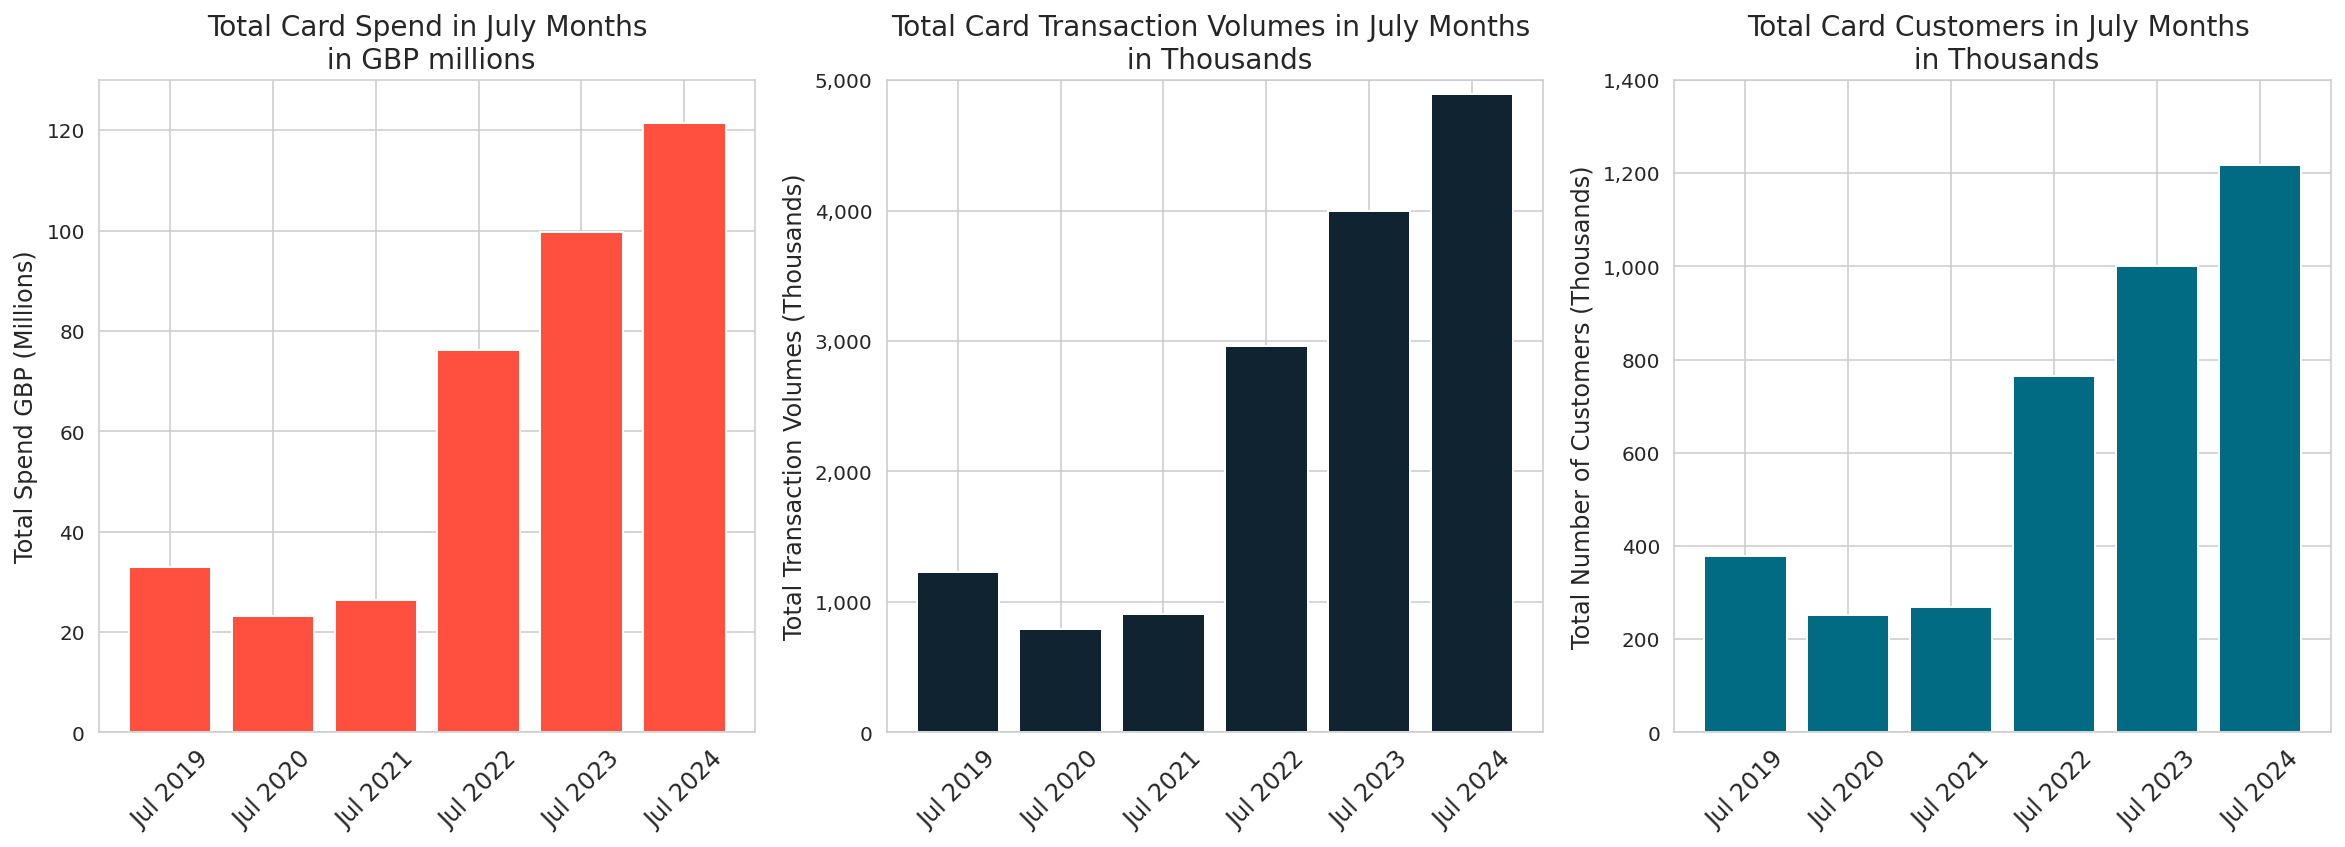

In [11]:
#apply function for chart
figure_size(20, 6)

bar_chart((131), volumes['year_month'], volumes['total_spend_mns'], '#ff4f3f', 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 130), volumes['year_month'], 45, None, 
          'Total Spend GBP (Millions)', 'Total Card Spend in July Months\n in GBP millions')

bar_chart((132), volumes['year_month'], volumes['num_transactions_thousands'], '#102331', 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 5000), volumes['year_month'], 45, None, 
          'Total Transaction Volumes (Thousands)', 'Total Card Transaction Volumes in July Months \n in Thousands')

bar_chart((133), volumes['year_month'], volumes['num_customers_thousands'], '#016b83', 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 1400), volumes['year_month'], 45, None, 
          'Total Number of Customers (Thousands)', 
           'Total Card Customers in July Months \n in Thousands')

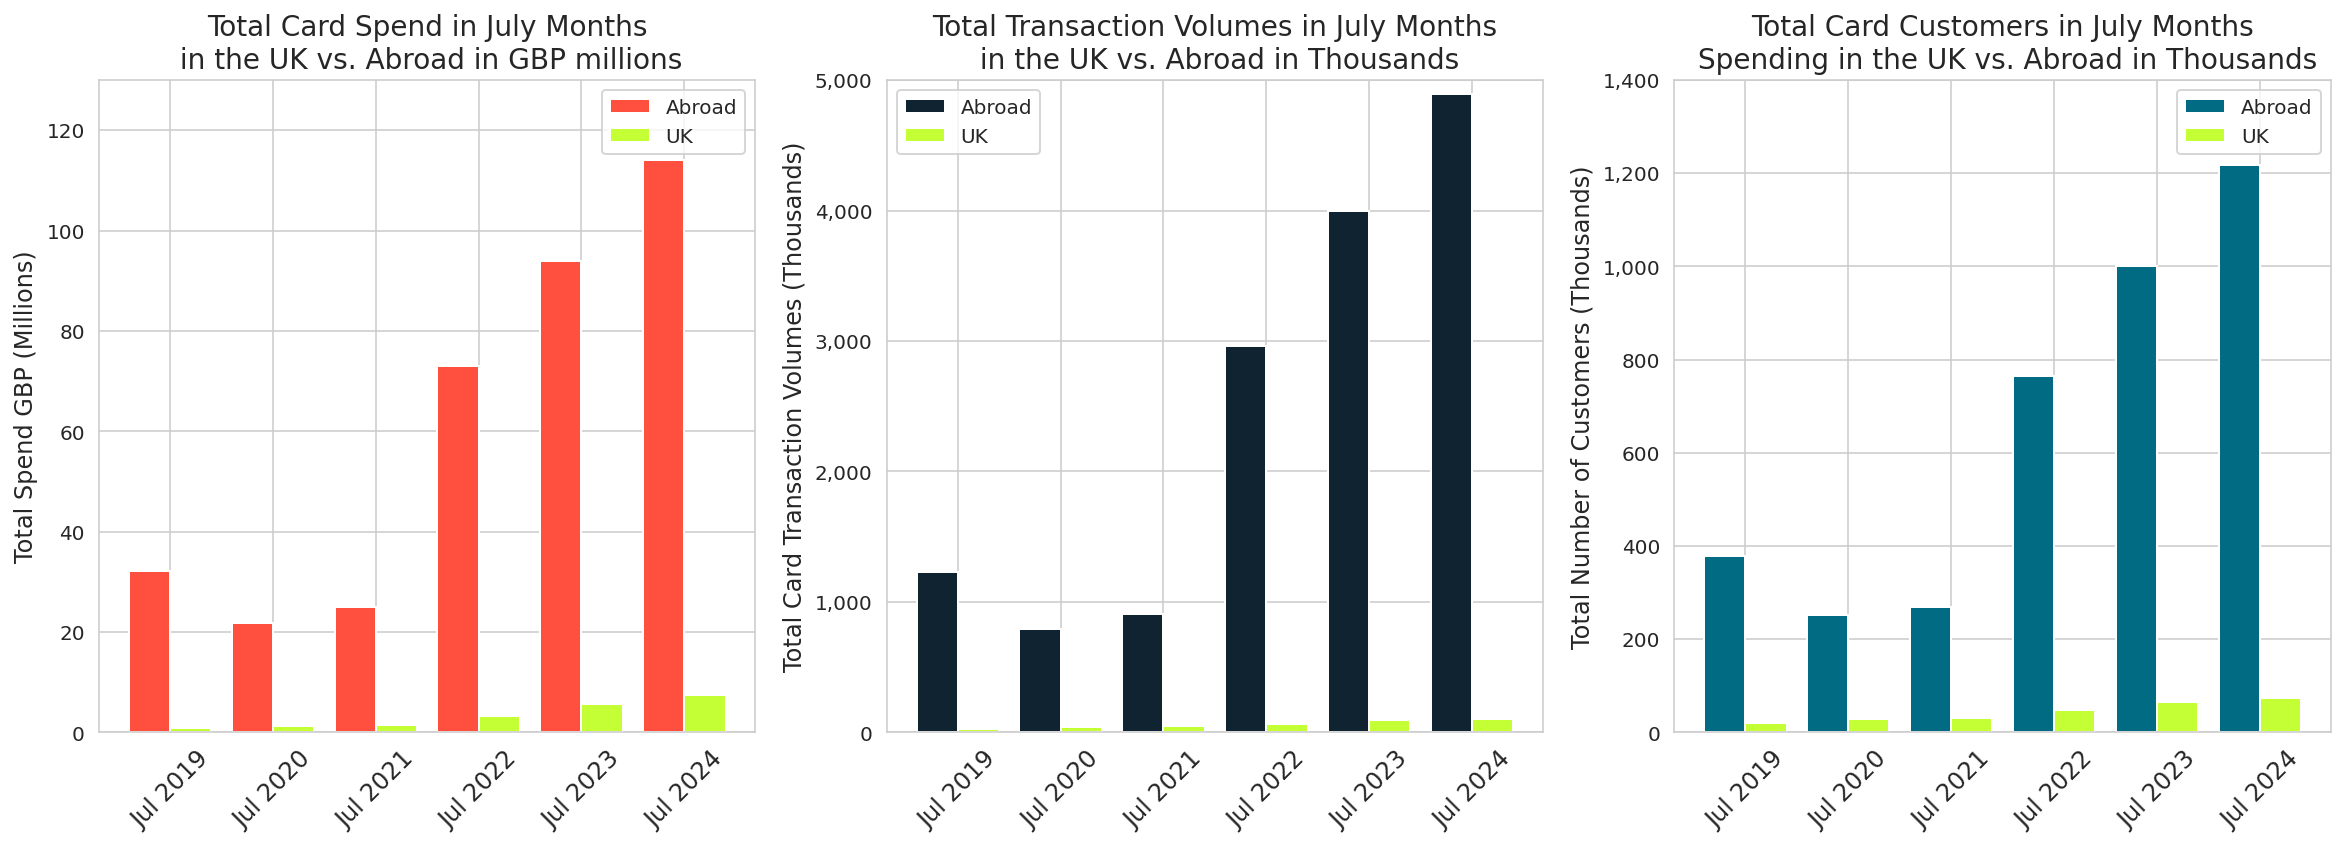

In [12]:
#apply function to show spending in the UK vs abroad
figure_size(20, 6)

side_by_side_bar((131), 6, volumes['total_spend_abroad_mns'], '#ff4f3f', volumes['total_spend_uk_mns'], 
                 '#c4ff35', tcr.StrMethodFormatter('{x:,.0f}'), (0,130), volumes['year_month'], 
                 45, None, 'Total Spend GBP (Millions)', 'Abroad', 'UK', 
                 'Total Card Spend in July Months\n in the UK vs. Abroad in GBP millions')

side_by_side_bar((132), 6, volumes['num_transactions_thousands'], '#102331', 
                 volumes['num_transactions_uk_thousands'], 
                 '#c4ff35', tcr.StrMethodFormatter('{x:,.0f}'), (0,5000), volumes['year_month'], 
                 45, None, 'Total Card Transaction Volumes (Thousands)', 'Abroad', 'UK', 
                 'Total Transaction Volumes in July Months\n in the UK vs. Abroad in Thousands')

side_by_side_bar((133), 6, volumes['num_customers_thousands'], '#016b83', 
                 volumes['num_customers_uk_thousands'], 
                 '#c4ff35', tcr.StrMethodFormatter('{x:,.0f}'), (0,1400), volumes['year_month'], 
                 45, None, 'Total Number of Customers (Thousands)', 'Abroad', 'UK', 
                 'Total Card Customers in July Months\n Spending in the UK vs. Abroad in Thousands')


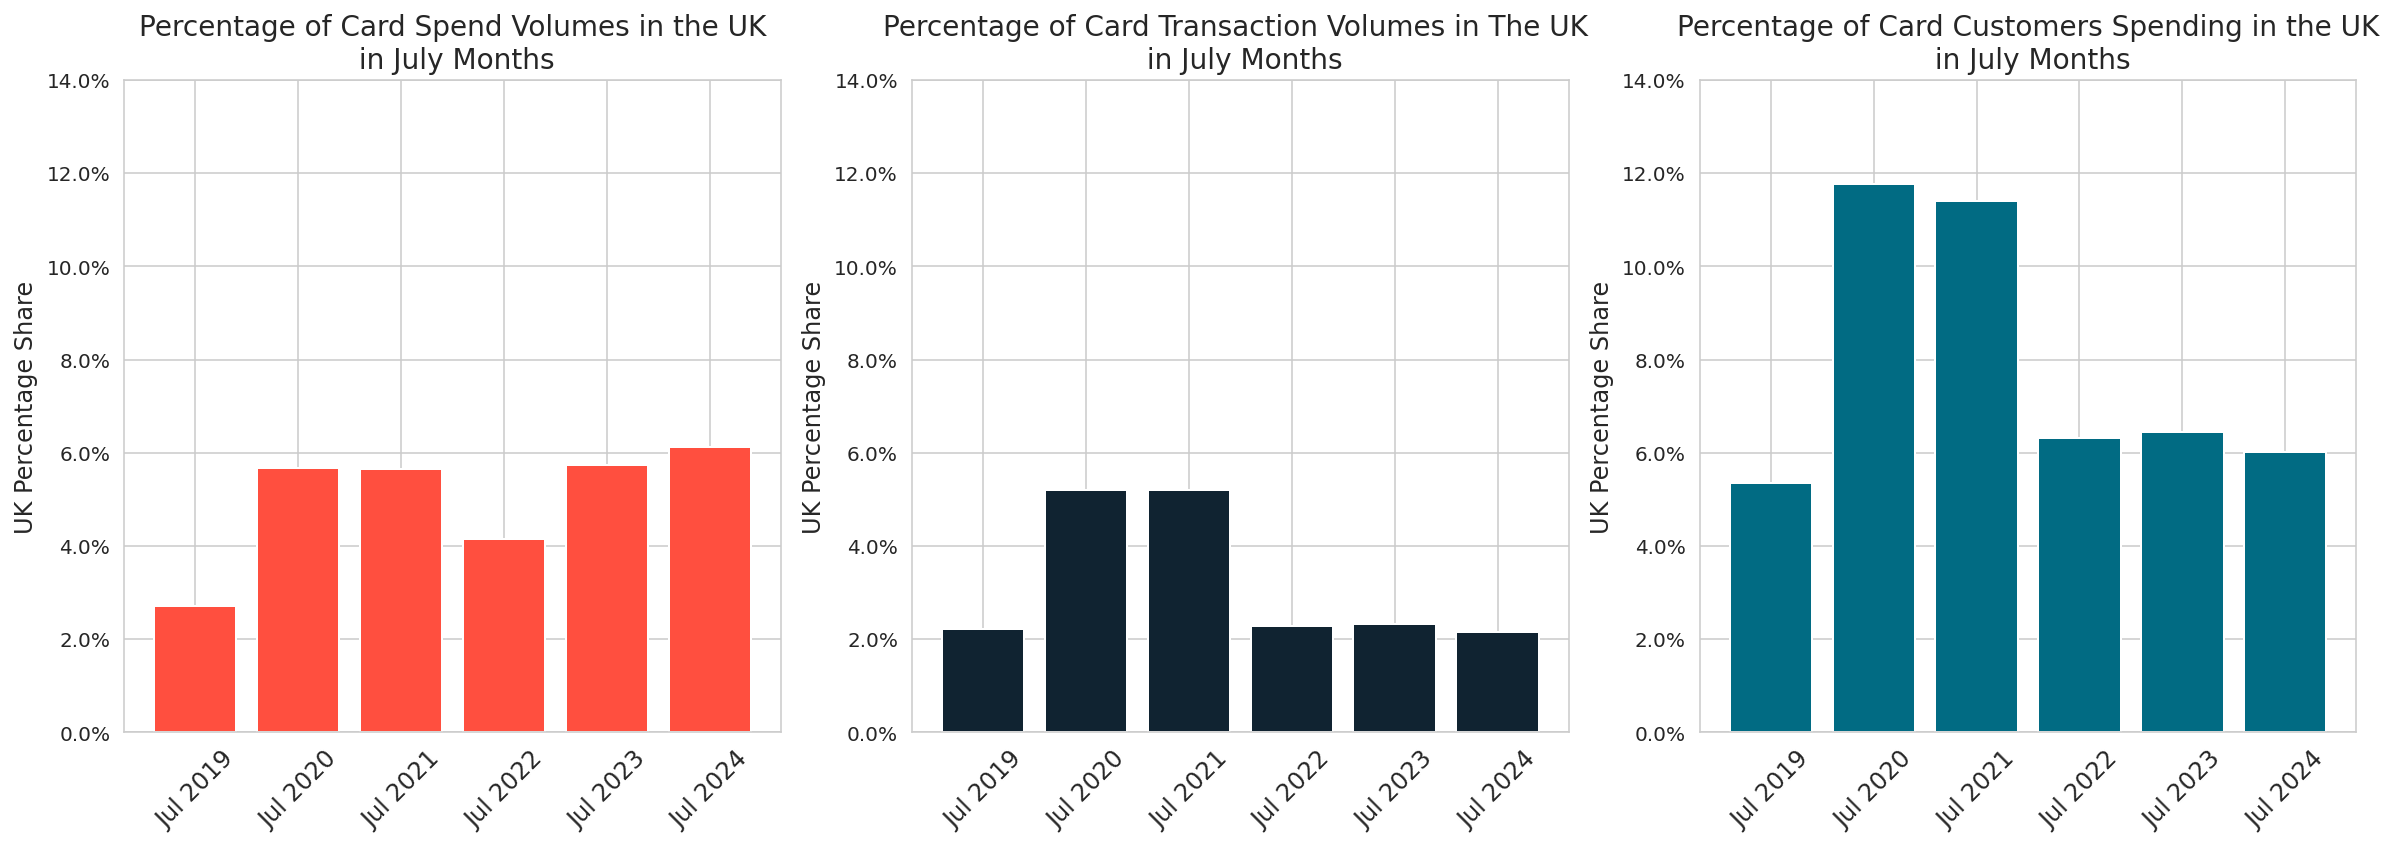

In [13]:
#apply function to show UK shares
figure_size(20, 6)

bar_chart((131), volumes['year_month'], volumes['total_spend_uk_share'], '#ff4f3f', 
          tcr.PercentFormatter(xmax = 100), (0, 14), volumes['year_month'], 45, None, 
          'UK Percentage Share', 'Percentage of Card Spend Volumes in the UK\n in July Months')

bar_chart((132), volumes['year_month'], volumes['num_transactions_uk_share'], '#102331', 
          tcr.PercentFormatter(xmax = 100), (0, 14), volumes['year_month'], 45, None, 
          'UK Percentage Share', 'Percentage of Card Transaction Volumes in The UK \n in July Months')

bar_chart((133), volumes['year_month'], volumes['num_customers_uk_share'], '#016b83', 
          tcr.PercentFormatter(xmax = 100), (0, 14), volumes['year_month'], 45, None, 
          'UK Percentage Share', 
           'Percentage of Card Customers Spending in the UK\n in July Months')

# Spend Over £5 Million

In [14]:
#read in data
spend_over_5 = pd.read_csv('/home/amybirdee/hobby_projects/Monzo/csv_files/spend_over_5m.csv', delimiter = ',')

In [15]:
#convert data to millions
spend_over_5['total_spend_mns'] = round(spend_over_5['total_spend'] / 1000000, 2)

In [16]:
#will show this as a table so no need to visualise
spend_over_5

,currency_name,total_spend,total_spend_mns
0,Euro,60475179.20,60.48
1,US Dollar,14177257.57,14.18


# Top Ten Spend Currencies

In [17]:
#read in data
top_ten = pd.read_csv('/home/amybirdee/hobby_projects/Monzo/csv_files/top_10_currencies.csv', delimiter = ',')

In [18]:
#check data
top_ten.head()

,currency_name,total_spend
0,Euro,60475179.20
1,US Dollar,14177257.57
2,Turkish Lira,2726805.00
3,Canadian Dollar,1754533.04
4,UAE Dirham,1684352.17


In [19]:
#check datatypes
top_ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   currency_name  10 non-null     object 
 1   total_spend    10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [20]:
#convert values to millions for chart
top_ten['total_spend_mns'] = round(top_ten['total_spend'] / 1000000, 2)

In [21]:
#we have UK spend date in volumes table. Get July 2023 data from that so we can include it in the top ten chart
uk_spend = volumes[['year_month','total_spend_uk_mns']]

#extract data and rename columns
uk_spend_jul_23 = uk_spend[uk_spend['year_month'] == 'Jul 2023'].rename(columns = \
                                                                {'year_month': 'currency_name',
                                                                'total_spend_uk_mns': 'total_spend_mns'}) 

#replace time period with currency
uk_spend_jul_23['currency_name'] = uk_spend_jul_23['currency_name'].str.replace('Jul 2023', 'British Pound')

#concatenate with top_ten table
top_eleven = pd.concat([top_ten, uk_spend_jul_23]).sort_values(by = 'total_spend_mns', \
                                                               ascending = False).reset_index(drop = True)

#drop the last row to make it top ten again
revised_ten = top_eleven[~top_eleven['currency_name'].isin(['Baht'])]

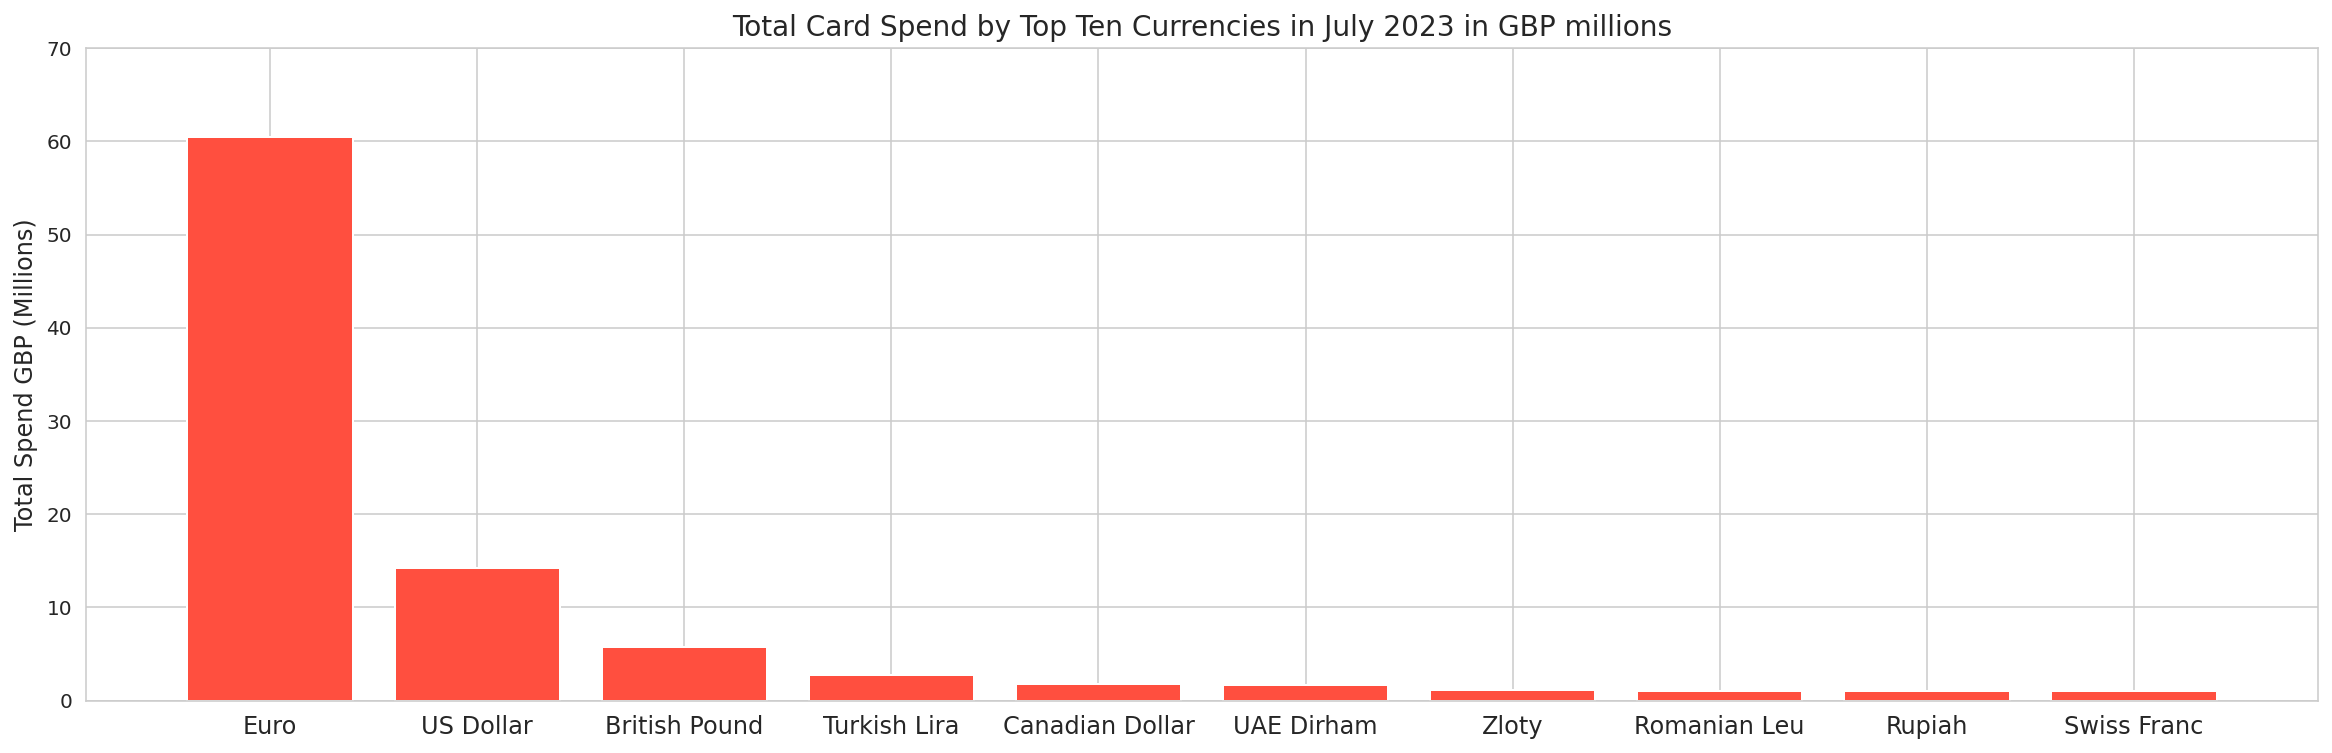

In [22]:
#apply function for chart
figure_size(20, 6)

bar_chart((111), revised_ten['currency_name'], revised_ten['total_spend_mns'], '#ff4f3f', 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 70), revised_ten['currency_name'], None, None, 
          'Total Spend GBP (Millions)', 'Total Card Spend by Top Ten Currencies in July 2023 in GBP millions')

# Currency Rate Rolling Averages

In [23]:
#read in data
rolling_avg = pd.read_csv('/home/amybirdee/hobby_projects/Monzo/csv_files/rolling_averages.csv', delimiter = ',')

In [24]:
#view data
rolling_avg.head()

,date,currency_name,ISO4217_currency_code,rolling_avg_rate_to_gbp
0,2023-07-01,Brazilian Real,986,0.16530
1,2023-07-02,Brazilian Real,986,0.16524
2,2023-07-03,Brazilian Real,986,0.16529
3,2023-07-04,Brazilian Real,986,0.16518
4,2023-07-05,Brazilian Real,986,0.16492


In [25]:
#check datatypes
rolling_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     93 non-null     object 
 1   currency_name            93 non-null     object 
 2   ISO4217_currency_code    93 non-null     int64  
 3   rolling_avg_rate_to_gbp  93 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ KB


In [26]:
#add column with name and code combined
rolling_avg['name_code'] = rolling_avg['currency_name'] + \
' (' + rolling_avg['ISO4217_currency_code'].astype(str) + ')'

In [27]:
#pivot data for charts
rolling_avg_pivot = rolling_avg.pivot_table(index = 'date',
                                           columns = 'name_code',
                                           values = 'rolling_avg_rate_to_gbp').reset_index()

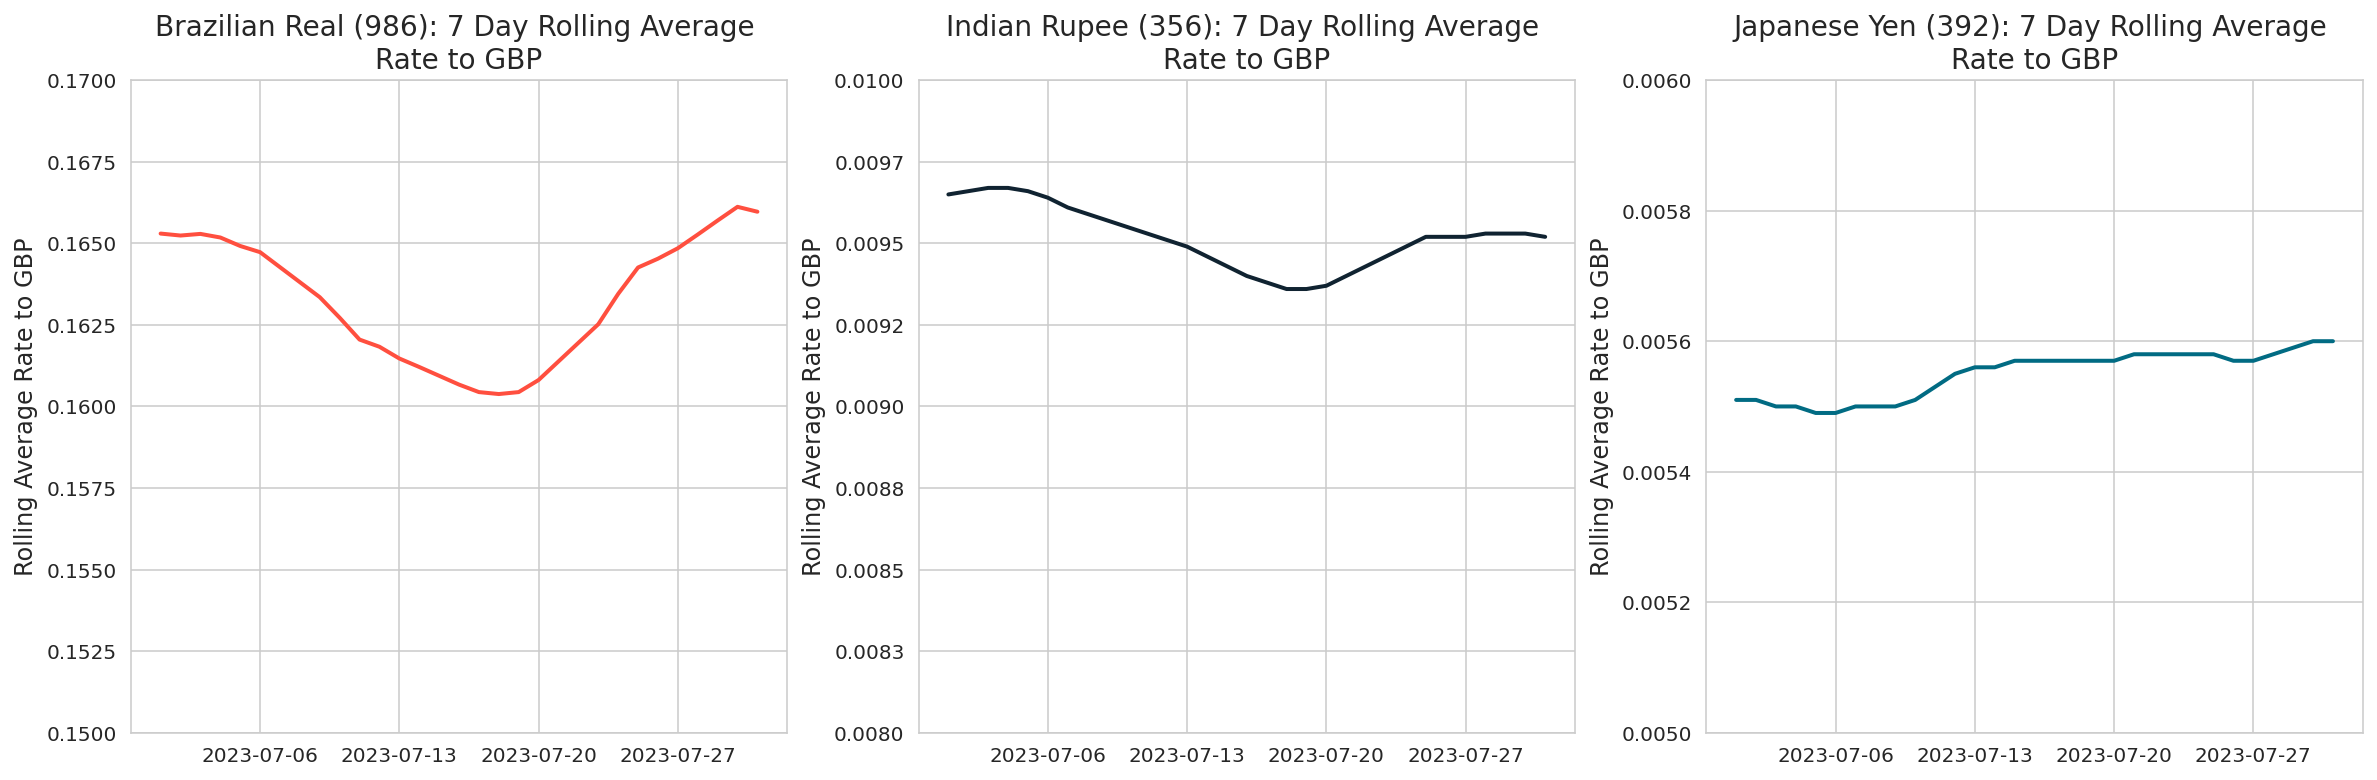

In [28]:
#apply function for charts
figure_size(20, 6)

line_chart((131), rolling_avg_pivot['date'], rolling_avg_pivot['Brazilian Real (986)'], '#ff4f3f',
           tcr.StrMethodFormatter('{x:,.4f}'), (0.150, 0.17), None, 'Rolling Average Rate to GBP', 
           'Brazilian Real (986): 7 Day Rolling Average \nRate to GBP')

line_chart((132), rolling_avg_pivot['date'], rolling_avg_pivot['Indian Rupee (356)'], '#102331',
           tcr.StrMethodFormatter('{x:,.4f}'), (0.008, 0.010), None, 'Rolling Average Rate to GBP', 
           'Indian Rupee (356): 7 Day Rolling Average \nRate to GBP')

line_chart((133), rolling_avg_pivot['date'], rolling_avg_pivot['Yen (392)'], '#016b83',
           tcr.StrMethodFormatter('{x:,.4f}'), (0.005, 0.006), None, 'Rolling Average Rate to GBP', 
           'Japanese Yen (392): 7 Day Rolling Average \nRate to GBP')